<a href="https://colab.research.google.com/github/cirvine26/PDE_Project/blob/master/AMA_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Libraries
import numpy as np
from matplotlib import pyplot as plt

#Defining a function to calculate the first numerical spatial derivative, necessary for the Taylor expansion 
#with respect to time
def numerical_first_derivative(u_vector,dx):
    v=np.zeros(len(u_vector))
    for ii in np.arange(1,len(u_vector) - 1):
        v[ii]=(u_vector[ii+1]-u_vector[ii-1])/(2*dx)
    v[0]=v[1]
    v[len(v)-1]=v[len(v)-2]
    return v
  
#Defining a function to calculate the second numerical spatial derivative, necessary for the Taylor expansion
#to the second order with respect to time
def numerical_second_derivative(u1_vector, dx):
    v2 = np.zeros(len(u1_vector))
    for ii in np.arange(1, len(u1_vector) - 1):
        v2[ii] = (u1_vector[ii+1] - 2*u1_vector[ii] + u1_vector[ii-1])/(dx**2)
    v2[-1]=v2[-2]
    v2[0] = v2[1]
    return v2
  
#Defining a spatial function for use in evaluation of the PDEs
def u_values(x):
    u = np.exp(-x**2)
    return u

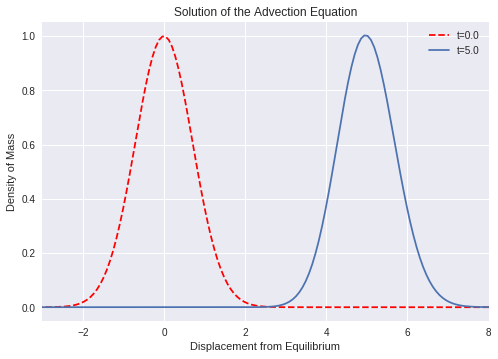

In [0]:
'''This code block will solve the Advection Equation Arbitrarily'''

#Initialising variables
x=np.linspace(-10,10,250)
dx=x[1]-x[0]
t=0
dt=0.01*dx
T=5
C=1

#Range of u values over the space x
u0=u_values(x)
u=u_values(x)

    
#Defining a while loop to operate iteratively on u(x,t=0) using the Taylor expansion u(x,t+dt)
#to give us u(x,T)
while t<T:
    t=t+dt
    dudx=numerical_first_derivative(u,dx)
    u=u-(C*dt*dudx)
    u[0]=u[-1] 	#Boundary condition must be specified on each iteration, causing it to loop

#Plot numerical and analytical solution
plt.plot(x,u0,'r--',label='t=0.0')
plt.plot(x,u,label='t=%.1f' %t)
plt.xlabel('Displacement from Equilibrium')
plt.ylabel('Density of Mass')
plt.xlim([-3,8])
plt.title('Solution of the Advection Equation')
plt.legend()

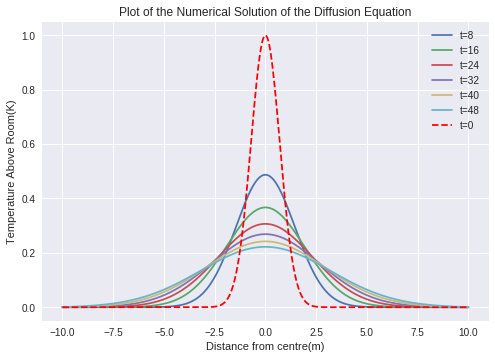

In [0]:
'''This code block will solve the Diffusion Equation Arbitrarily'''

#Initialising variables
x=np.linspace(-10,10,500)
s = u_values(x)
s0 = u_values(x)
dx=x[1]-x[0]
t=0
D=0.1
T=50
dt=0.5*dx*dx/D #Von Neumann Stability Condition
count = 0

#Uses forward in time method and numerical second derivative function to get a solution
while t<T:
    t+=dt
    dsdx2 = numerical_second_derivative(s, dx)
    s=s+(D*dt*dsdx2)
    s[0]=0 #Boundary condition must be specified on each iteration 
    s[-1]=0 #Temperature fixed at both ends of rod 
    count+=1
    if count%1000==0:
      #Plot each state of the diffusion process over a number of time intervals
      plt.plot(x,s,label='t=%d' %(t))
        
#Plot the initial state
plt.plot(x,s0,'r--', label='t=0')
plt.xlabel('Distance from centre(m)')
plt.ylabel('Temperature Above Room(K)')
plt.title('Plot of the Numerical Solution of the Diffusion Equation')
plt.legend()

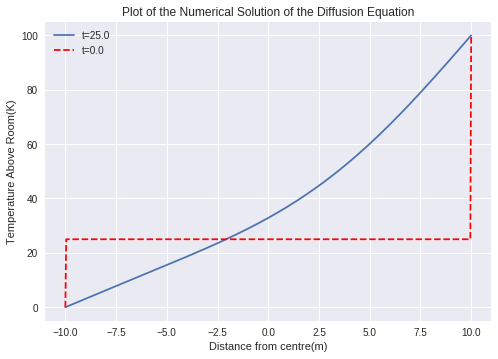

In [0]:
'''This code block will solve the Diffusion Equation for a Heat Rod (from lecture)'''

#This problem sees a rod at room temperature with one end in a heat source at 100 degrees and one end in an ice bath at 0 degrees
Initial=np.zeros(500) + 25
Initial[0]=0
Initial[-1]=100 #Boundary Conditions 
u=np.zeros(500)+25
u[0]=0
u[-1]=100

#Initialising variables
x=np.linspace(-10,10,500)
dx=x[1]-x[0]
D=1
t=0
dt=0.5*dx*dx/D #Von Neumann Stability Condition
T=25

#Uses forward in time method and numerical second derivative function to get a solution
while t<T:
    t+=dt
    dudx2 = numerical_second_derivative(u, dx)
    u+=(D*dt*dudx2)
    u[0]=0 #Boundary condition must be specified on each iteration 
    u[-1]=100 #Temperature fixed at both ends of rod 
      
#Plot initial state and a specific state of time
plt.plot(x,u, label='t=%.1f' %(t))
plt.plot(x,Initial,'r--', label='t=0.0')
plt.xlabel('Distance from centre(m)')
plt.ylabel('Temperature Above Room(K)')
plt.title('Plot of the Numerical Solution of the Diffusion Equation')
plt.legend()

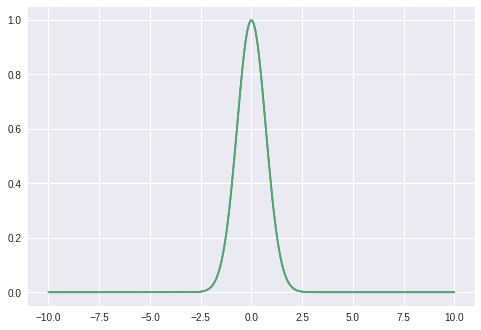

In [0]:
#Advection analytical 
x=np.linspace(-10,10,250)
dx=x[1]-x[0]
t=0
dt=0.01*dx
T=5
C=1
t_values=np.arange(0,T+dt,dt)
for ii in (0,T):
  dt=ii*dt
  p_values=x-ii*dt
  u_analytical=np.exp(-(p_values**2))
plt.plot(x,u0)
plt.plot(x,u_analytical)